# Multivariate regression based on MPI

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data_raw = pd.read_csv('../data/country-data.csv')

mpi_data = pd.read_csv("../data/MPI.csv")
mpi_data =  mpi_data[['Country','MPI Urban','MPI Rural']]

# rename column
mpi_data.rename(
    columns = {
        'Country': 'country',
        'MPI Urban': 'mpi_urban',
        'MPI Rural': 'mpi_rural'
    },
    inplace = True
)
mpi_data

,country,mpi_urban,mpi_rural
0,Kazakhstan,0.000,0.000
1,Serbia,0.000,0.002
2,Kyrgyzstan,0.000,0.003
3,Tunisia,0.000,0.012
4,Armenia,0.001,0.001
...,...,...,...
97,Central African Republic,0.289,0.519
98,Liberia,0.290,0.481
99,Somalia,0.293,0.651
100,Chad,0.351,0.609


In [3]:
combined = pd.merge(
    data_raw,
    mpi_data,
    on='country',
    how='inner'
)
combined

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,mpi_urban,mpi_rural
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.132,0.347
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.003,0.007
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.003,0.011
3,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0.001,0.001
4,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,0.009,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...
74,Ukraine,11.7,47.1,7.72,51.1,7820,13.40,70.4,1.44,2970,0.003,0.006
75,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0.004,0.010
76,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0.039,0.155
77,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0.080,0.304


In [5]:
countries = combined.country
combined.drop(columns=["country"], inplace=True)
columns = combined.columns
scaler = StandardScaler()
scaled_combined = scaler.fit_transform(combined) # numpy array
combined = pd.DataFrame(scaled_combined, columns=columns)
combined.index = countries
combined

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,mpi_urban,mpi_rural
country,,,,,,,,,,,
Afghanistan,0.692730,-1.313972,0.600447,0.198450,-0.939168,-0.013933,-1.105080,1.372382,-0.833781,0.630087,0.659690
Albania,-1.040704,-0.185608,0.152328,0.409820,0.808190,-0.404725,1.215106,-1.305958,0.405666,-0.876534,-1.081591
Algeria,-0.788697,0.466336,-0.883131,-0.572763,1.431947,0.511860,1.238192,-0.509521,0.535323,-0.876534,-1.061105
Armenia,-1.005376,-0.636954,-0.783065,0.221301,0.129829,-0.145776,0.868809,-1.280267,0.100798,-0.899892,-1.112319
Azerbaijan,-0.508427,1.463057,-0.139166,-1.184022,2.083005,0.330280,0.383994,-1.132540,1.018907,-0.806458,-0.938191
...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,-1.156109,1.011712,0.661357,0.552637,0.365050,0.298701,0.534056,-1.440839,0.013192,-0.876534,-1.086712
Uzbekistan,-0.576728,0.046334,-0.169621,-0.738431,-0.386818,0.543439,0.349365,-0.862780,-0.543981,-0.864855,-1.066227
Vanuatu,-0.743948,0.980368,-0.413258,0.644041,-0.657742,-0.552357,-0.320142,-0.117726,0.013192,-0.456081,-0.323622


<AxesSubplot: >

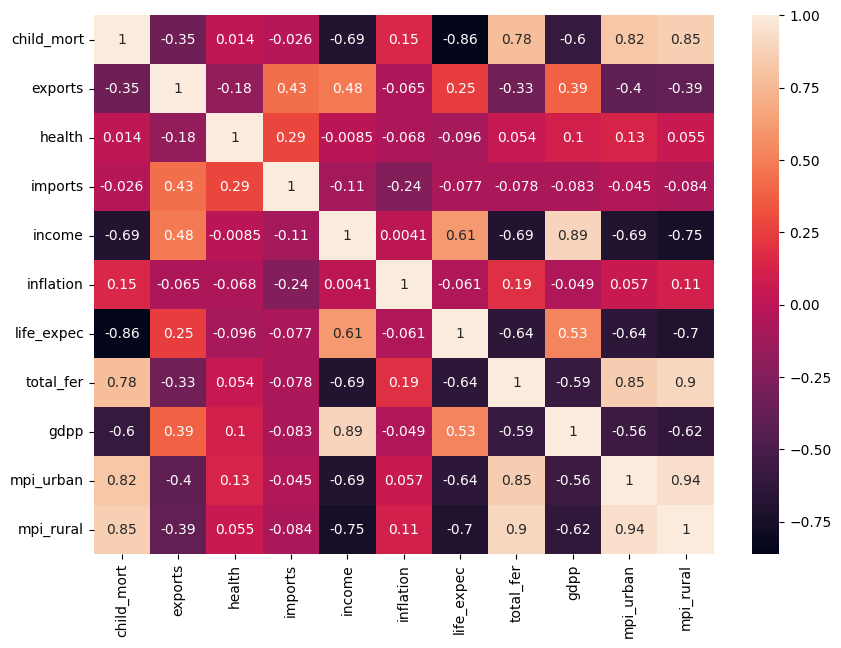

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(combined.corr(method='pearson', min_periods=1),annot=True)

In [11]:

reg = linear_model.LinearRegression()

Consider mpi_urban as dependent variable and see how much other features are correlated with it

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           9.91e-21
Time:                        11:12:13   Log-Likelihood:                -67.110
No. Observations:                  79   AIC:                             138.2
Df Residuals:                      77   BIC:                             143.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.295e-16      0.064  -2.01e-15      1.0

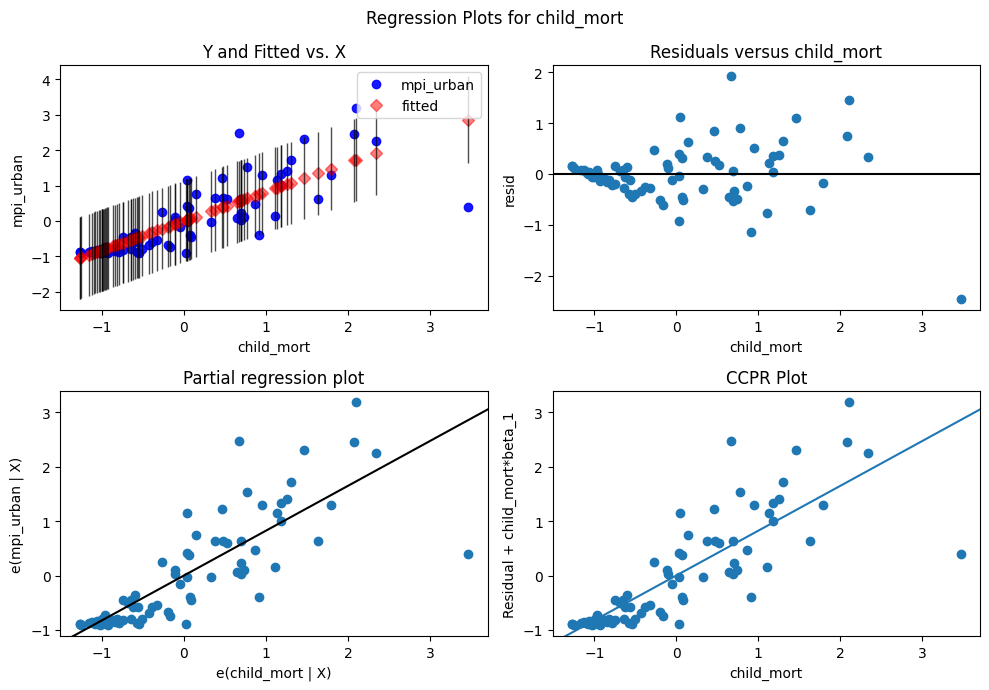

In [13]:
#fit simple linear regression model
model = ols('mpi_urban ~ child_mort', data=combined).fit()

#view model summary
print(model.summary())

#define figure size
fig = plt.figure(figsize=(10,7))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'child_mort', fig=fig)

Do the same for all other attributes in raw data that we have (exports, life_expectancy, etc). Then for further steps refer to:
https://www.kaggle.com/code/lauraviera/using-ml-to-allocate-funding-for-development-aid